In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [3]:
from io import StringIO
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz


def treeviz(tree): 
    dot_data = StringIO()  
    export_graphviz(tree, out_file=dot_data,  
                    feature_names=['petal (cm)', 'sepal (cm)'],  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())  

In [4]:
def plot_model_decision(model, proba=False):
    plt.figure(figsize=(8, 8))
    xx, yy = np.meshgrid(np.linspace(0, 9, 100),
                         np.linspace(0, 9, 100))

    if proba:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=0.3)


    for i, label in enumerate(iris.target_names):
        plt.scatter(X[y == i][:, 0], X[y == i][:, 1], label=label)

    plt.xlabel('Petal (cm)')
    plt.ylabel('Sepal (cm)')
    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.legend(loc='best');

In [5]:
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
X = iris.data[:, [2, 0]]
y = iris.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=50, random_state=42)

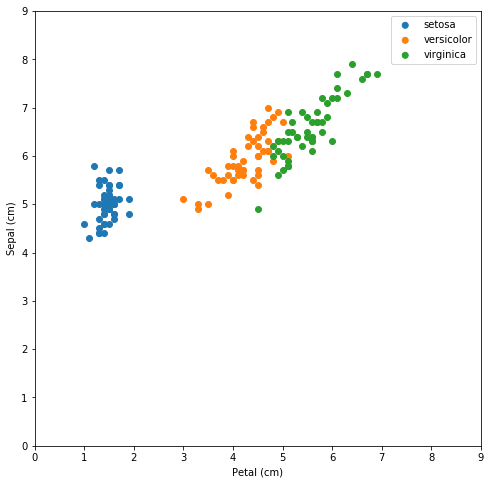

In [9]:
plt.figure(figsize=(8, 8))
for i, label in enumerate(iris.target_names):
    plt.scatter(X[y == i][:, 0], X[y == i][:, 1], label=label)

plt.xlabel('Petal (cm)')
plt.ylabel('Sepal (cm)')
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.legend(loc='best');

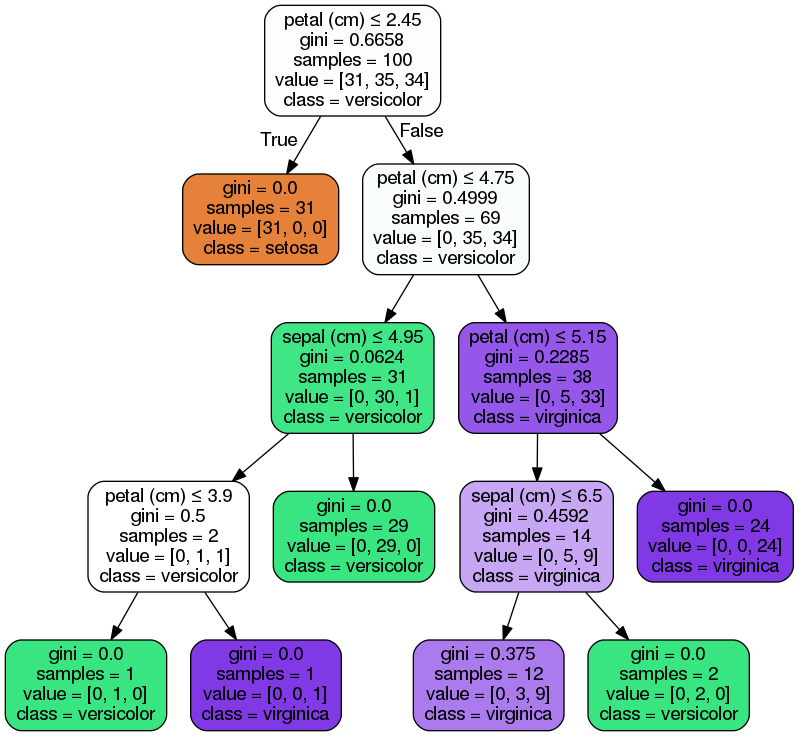

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
treeviz(tree)

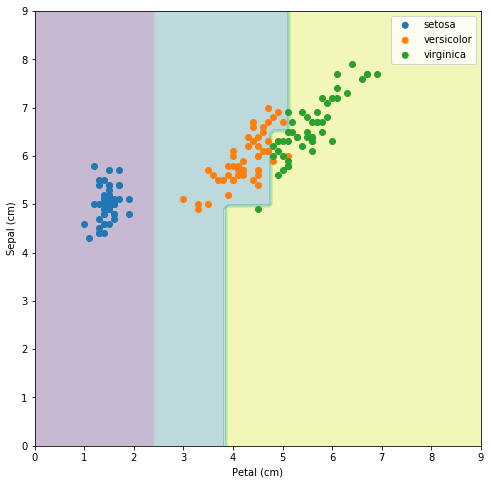

In [11]:
plot_model_decision(tree)

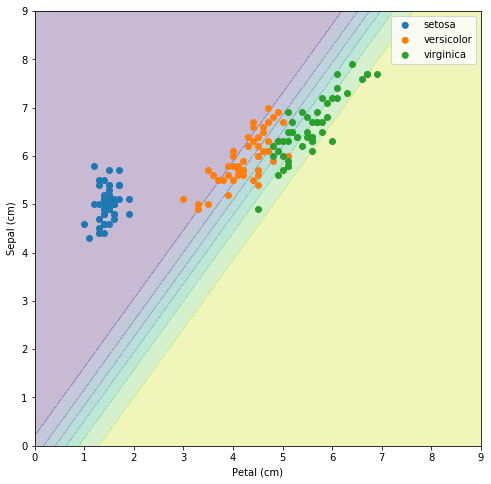

In [12]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression().fit(X_train[y_train != 0], y_train[y_train != 0])
plot_model_decision(lr_model, proba=True)

In [18]:
lr_model.coef_

array([[ 2.74093545, -1.93063409]])

In [19]:
lr_model.intercept_

array([-1.3439849])

In [13]:
from sklearn.linear_model import Perceptron

linear_model = Perceptron(n_iter=50)
linear_model.fit(X_train[y_train != 0], y_train[y_train != 0])

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=50, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [14]:
linear_model.score(X_test[y_test != 0], y_test[y_test != 0])

0.83870967741935487

In [15]:
linear_model.coef_

array([[ 91.3, -64.7]])

In [16]:
linear_model.intercept_

array([-56.])

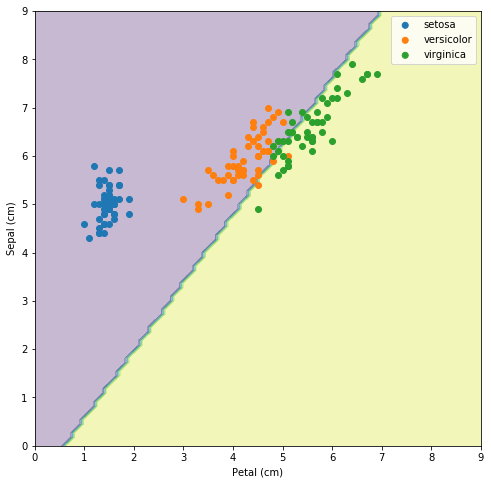

In [17]:
plot_model_decision(linear_model)